# Online Sales Analysis

#### Import Libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read Data Set

In [46]:
df = pd.read_csv('Online Sales Data.csv')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


#### Display Data Information

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


#### Change Date Data Type

In [48]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


#### Total Units Sold

In [49]:
df['Units Sold'].sum()

518

#### Total Revenue

In [50]:
df['Total Revenue'].sum()

80567.84999999999

#### Top 5 Categories with Most Total Revenue

Text(0.5, 1.0, 'Top 5 Categories with Most Total Revenue')

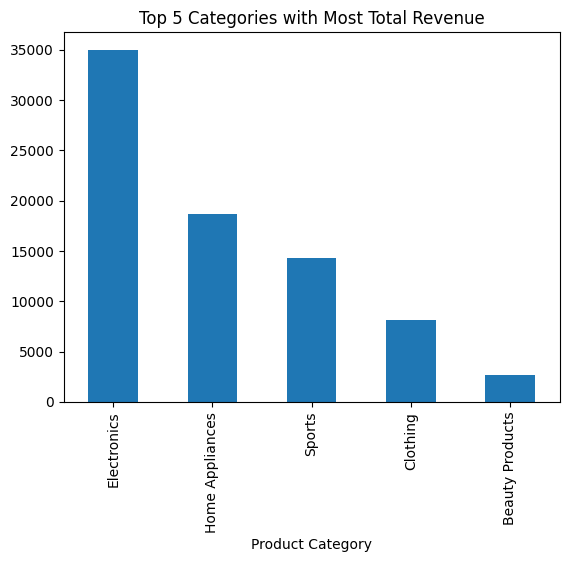

In [51]:
categories_revenue = df.groupby('Product Category')['Total Revenue'].sum().sort_values(ascending=False).head(5)
categories_revenue.plot(kind='bar')
plt.title('Top 5 Categories with Most Total Revenue')

#### Transactions by Each Region

Text(0.5, 1.0, 'Transactions by Each Region')

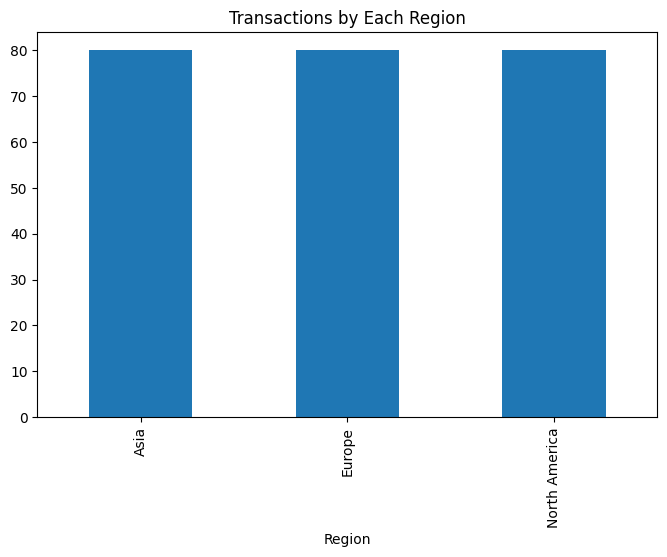

In [52]:
region_transactions = df.groupby('Region').count()['Transaction ID']
plt.figure(figsize=(8,5))
region_transactions.plot(kind='bar')
plt.title('Transactions by Each Region')

#### Most Popular Payment Method

Text(0.5, 1.0, 'Most Used Payment Methods')

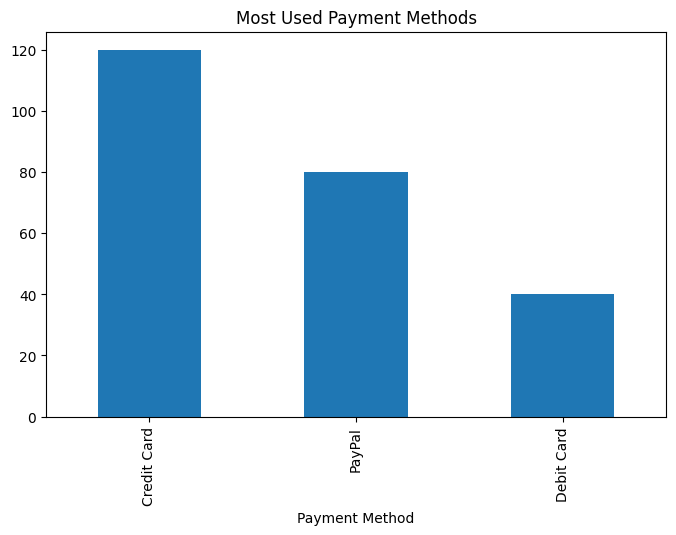

In [53]:
payment_method = df.groupby('Payment Method').count()['Transaction ID'].sort_values(ascending=False)
plt.figure(figsize=(8,5))
payment_method.plot(kind='bar')
plt.title('Most Used Payment Methods')

#### Monthly Total Revenue

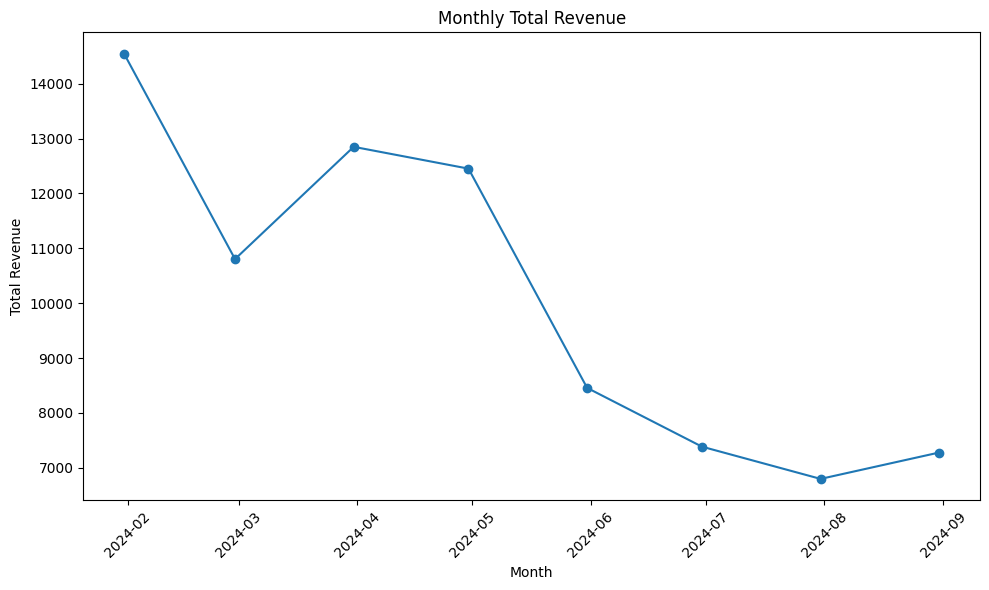

In [54]:
monthly_revenue = df.groupby(pd.Grouper(key='Date', freq='M'))['Total Revenue'].sum()
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.title('Monthly Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Average Unit Price

Text(0.5, 1.0, 'Average Units Sold per Transaction by Category')

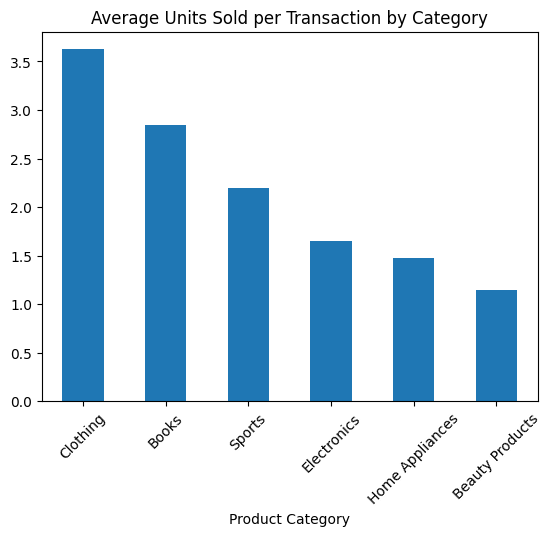

In [55]:
category_units_sold = df.groupby('Product Category')['Units Sold'].mean().sort_values(ascending=False)
category_units_sold.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Average Units Sold per Transaction by Category')

#### Average Units Sold per Transaction

In [56]:
average_units_sold_per_transaction = df.groupby('Transaction ID')['Units Sold'].mean().mean()
print("Average Unit Sold per Transaction: ", average_units_sold_per_transaction)

Average Unit Sold per Transaction:  2.158333333333333


#### Top 10 Product with Highest Total Revenue

Product Name
Canon EOS R5 Camera                  1
LG OLED TV                           2
MacBook Pro 16-inch                  1
Apple MacBook Pro 16-inch            1
iPhone 14 Pro                        2
Peloton Bike                         1
HP Spectre x360 Laptop               1
Roomba i7+                           2
Garmin Forerunner 945                3
Samsung Odyssey G9 Gaming Monitor    1
Name: Units Sold, dtype: int64


Text(0.5, 1.0, 'Top 10 Products with Highest Total Revenue')

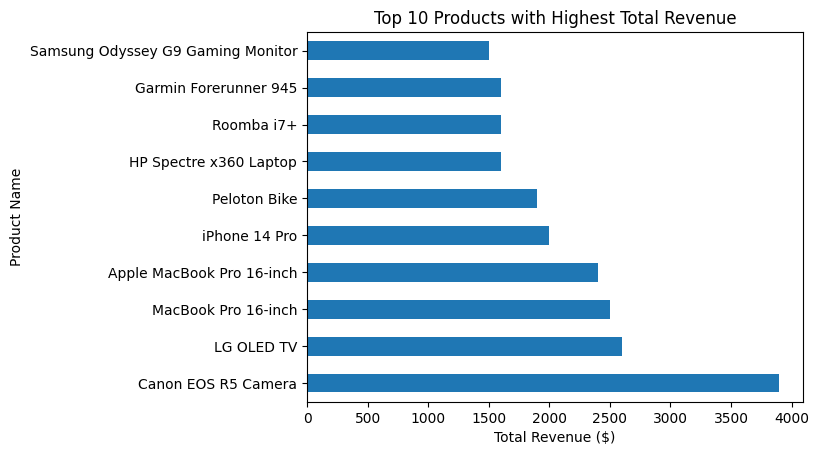

In [ ]:
top_10_products = df.groupby('Product Name')['Total Revenue'].sum().sort_values(ascending=False).head(10)
units_sold = df.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False).head(10)
print(units_sold)
top_10_products.plot(kind='barh')
plt.ylabel('Product Name')
plt.xlabel('Total Revenue ($)')
plt.title('Top 10 Products with Highest Total Revenue')

#### Minimum and Maximum Price for Each Product Category

                  Minimum Price  Maximum Price
Product Category                              
Beauty Products            6.50         399.99
Books                      7.99          35.99
Clothing                   9.90         249.99
Electronics               49.99        3899.99
Home Appliances           49.99        1299.99
Sports                    24.99        1895.00


<Axes: ylabel='Product Category'>

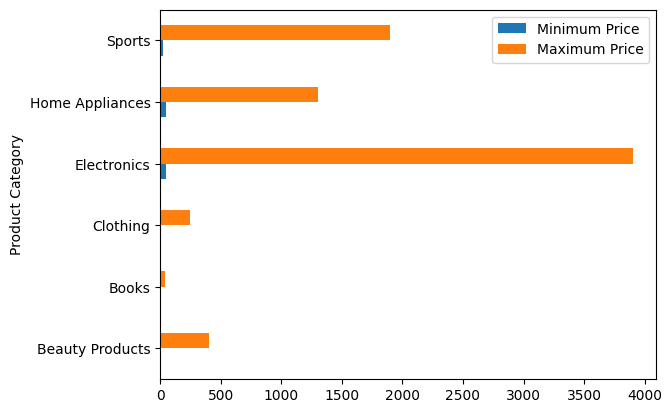

In [62]:
minimum_price_per_category = df.groupby('Product Category')['Unit Price'].min()
maximum_price_per_category = df.groupby('Product Category')['Unit Price'].max()
price_range_per_category = pd.DataFrame({
    'Minimum Price': minimum_price_per_category,
    'Maximum Price': maximum_price_per_category
})
print(price_range_per_category)
price_range_per_category.plot(kind='barh')

#### Revenue Contribution for Each Product Category

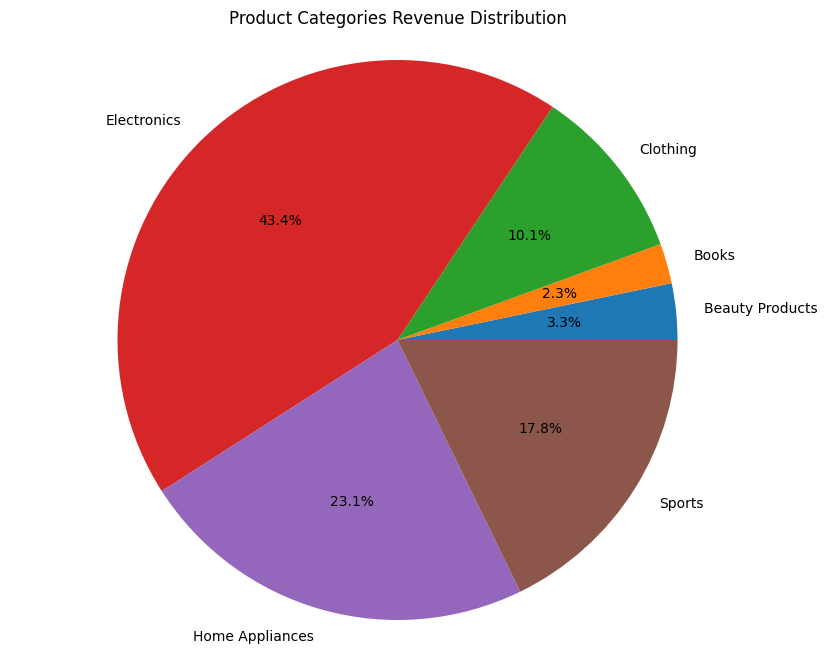

In [ ]:
category_revenue_pct = df.groupby('Product Category')['Total Revenue'].sum()
total = category_revenue_pct.sum()
category_revenue_pct = (category_revenue_pct / total * 100)

plt.figure(figsize=(10, 8))
plt.pie(category_revenue_pct, labels=category_revenue_pct.index, autopct='%1.1f%%')
plt.title('Product Categories Revenue Distribution')
plt.axis('equal')
plt.show()


#### High Value Transaction

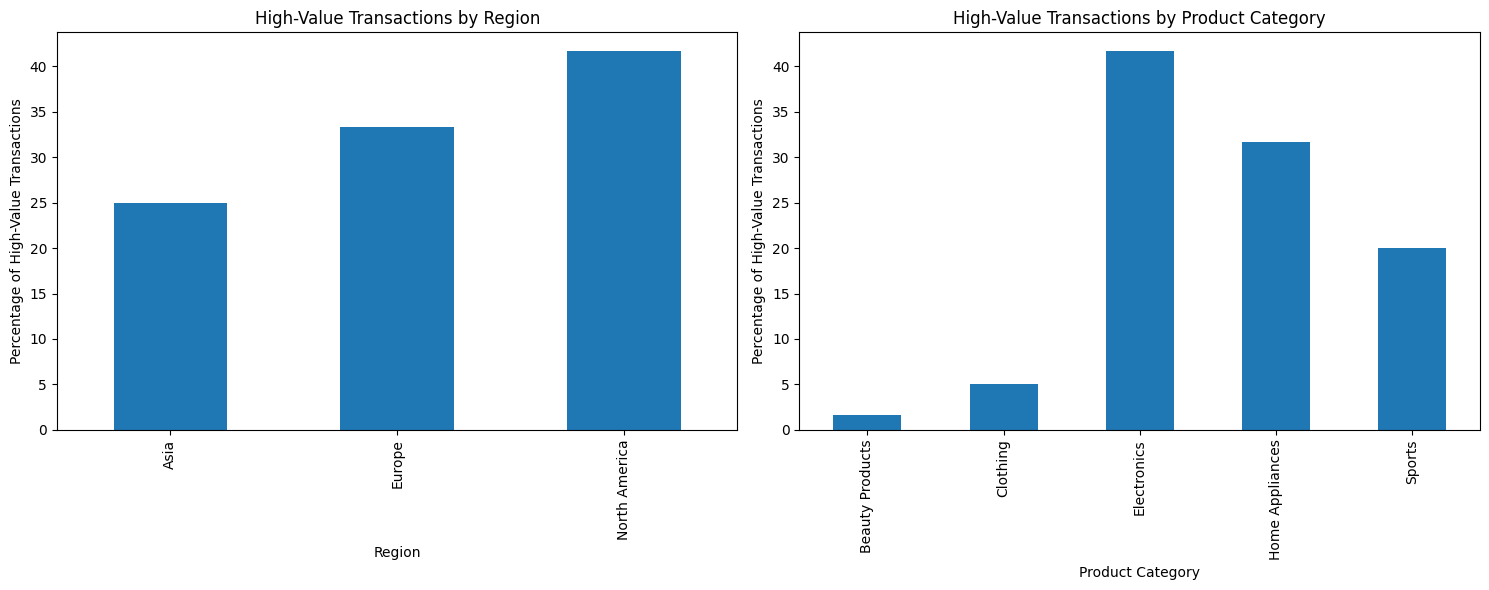


Threshold for High-Value Transactions: $399.23

Number of High-Value Transactions by Region:
Region
Asia             15
Europe           20
North America    25
dtype: int64

Number of High-Value Transactions by Product Category:
Product Category
Beauty Products     1
Clothing            3
Electronics        25
Home Appliances    19
Sports             12
dtype: int64


In [ ]:
threshold = df['Total Revenue'].quantile(0.75)

high_value_trans = df[df['Total Revenue'] > threshold]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

region_dist = high_value_trans.groupby('Region').size()
region_pct = (region_dist / len(high_value_trans) * 100)
region_pct.plot(kind='bar', ax=ax1)
ax1.set_title('High-Value Transactions by Region')
ax1.set_ylabel('Percentage of High-Value Transactions')

category_dist = high_value_trans.groupby('Product Category').size()
category_pct = (category_dist / len(high_value_trans) * 100)
category_pct.plot(kind='bar', ax=ax2)
ax2.set_title('High-Value Transactions by Product Category')
ax2.set_ylabel('Percentage of High-Value Transactions')

plt.tight_layout()
plt.show()

print(f"\nThreshold for High-Value Transactions: ${threshold:.2f}")
print("\nNumber of High-Value Transactions by Region:")
print(region_dist)
print("\nNumber of High-Value Transactions by Product Category:")
print(category_dist)

#### Payment Method by Region

In [ ]:
payment_region_ct = pd.crosstab(df['Region'], df['Payment Method'])

print(payment_region_ct)

payment_region_pct = payment_region_ct.div(payment_region_ct.sum(axis=1), axis=0) * 100

max_reliance = payment_region_pct.max(axis=1)
region_highest_reliance = max_reliance.idxmax()
method_highest_reliance = payment_region_pct.loc[region_highest_reliance].idxmax()
reliance_pct = max_reliance.max()

print(f"\nRegion with highest reliance on a single payment method: {region_highest_reliance}")
print(f"Payment Method: {method_highest_reliance}")
print(f"Reliance: {reliance_pct:.2f}%")

Payment Method  Credit Card  Debit Card  PayPal
Region                                         
Asia                     40          40       0
Europe                    0           0      80
North America            80           0       0

Region with highest reliance on a single payment method: Europe
Payment Method: PayPal
Reliance: 100.00%


#### Units Sold Efficiency

Pearson correlation (Units Sold vs Total Revenue): -0.157


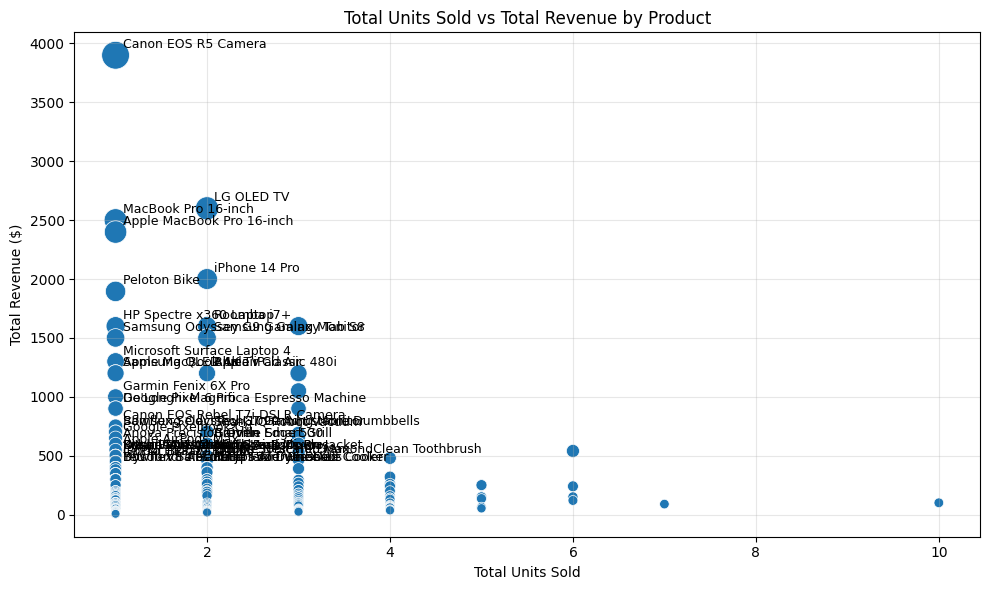


Products with low units sold but high total revenue (high-ticket items):


,Product Name,Units Sold,Total Revenue
39,Canon EOS R5 Camera,1,3899.99
111,LG OLED TV,2,2599.98
124,MacBook Pro 16-inch,1,2499.99
18,Apple MacBook Pro 16-inch,1,2399.00
230,iPhone 14 Pro,2,1999.98
151,Peloton Bike,1,1895.00
91,HP Spectre x360 Laptop,1,1599.99
160,Roomba i7+,2,1599.98
165,Samsung Odyssey G9 Gaming Monitor,1,1499.99
162,Samsung Galaxy Tab S8,2,1499.98


In [78]:
prod_group = df.groupby('Product Name').agg({'Units Sold': 'sum', 'Total Revenue': 'sum'}).reset_index()
prod_group = prod_group.sort_values('Total Revenue', ascending=False)

plt.figure(figsize=(10,6))
sns.scatterplot(data=prod_group, x='Units Sold', y='Total Revenue',
                size='Total Revenue', sizes=(40, 400), legend=False)
plt.title('Total Units Sold vs Total Revenue by Product')
plt.xlabel('Total Units Sold')
plt.ylabel('Total Revenue ($)')
plt.grid(alpha=0.3)

corr = prod_group['Units Sold'].corr(prod_group['Total Revenue'])
print(f"Pearson correlation (Units Sold vs Total Revenue): {corr:.3f}")

low_units_thresh = 2  # treat <=2 total units as low-volume
high_rev_thresh = prod_group['Total Revenue'].quantile(0.75)  # top 25% revenue
candidates = prod_group[(prod_group['Units Sold'] <= low_units_thresh) & (prod_group['Total Revenue'] >= high_rev_thresh)]

for _, row in candidates.iterrows():
    plt.annotate(row['Product Name'],
                 (row['Units Sold'], row['Total Revenue']),
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

if not candidates.empty:
    print("\nProducts with low units sold but high total revenue (high-ticket items):")
    display(candidates[['Product Name', 'Units Sold', 'Total Revenue']])
else:
    print("\nNo clear low-units high-revenue products found with the chosen thresholds.")